In [1]:
import numpy as np
import pandas as pd

In [2]:
filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names, dtype={"PLZ": str, "YEAROFBIRTH": int},
                              keep_default_na=False)
df.shape[0]

200000

In [3]:
df1 = df[df.sourceID == "A"]
df2 = df[df.sourceID == "B"]
df1.shape[0]

100000

In [4]:
from resampling import *
import matplotlib.pyplot as plt

In [5]:
df[df.GENDER == "M"].FIRSTNAME.value_counts()

JAMES      3747
JOHN       2957
WILLIAM    2896
ROBERT     2693
MICHAEL    2650
           ... 
GUNTHER       1
COLEN         1
CSABA         1
JAMAEZ        1
BECK          1
Name: FIRSTNAME, Length: 6528, dtype: int64

In [6]:
df[df.GENDER == "F"].FIRSTNAME.value_counts()

MARY          2371
JENNIFER      1308
ELIZABETH     1294
LINDA         1260
PATRICIA      1251
              ... 
TOWANA           1
CRISSY           1
EVANGELINA       1
DESELDER         1
SHAJUANA         1
Name: FIRSTNAME, Length: 11366, dtype: int64

<AxesSubplot:>

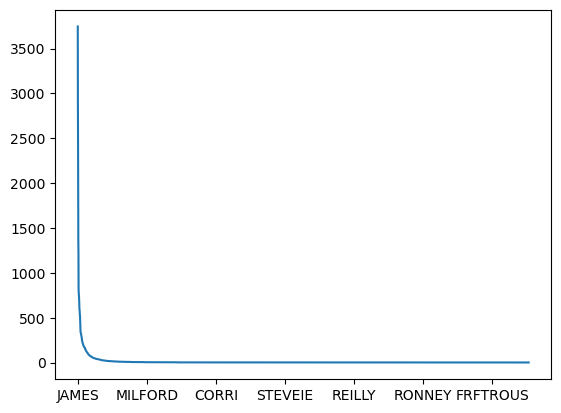

In [7]:
plt.grid(False)
df[df.GENDER == "M"].FIRSTNAME.value_counts().plot()

<AxesSubplot:>

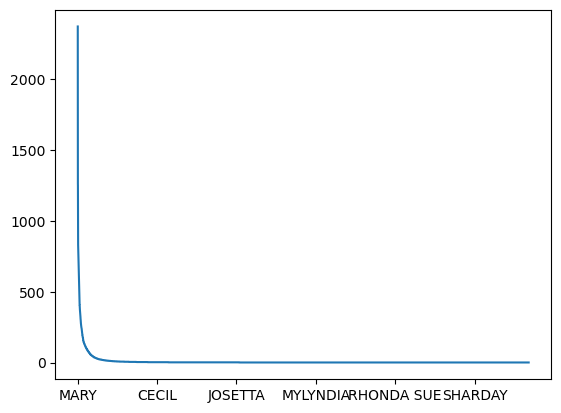

In [8]:
df[df.GENDER == "F"].FIRSTNAME.value_counts().plot()

In [9]:
df[df.GENDER == "F"].FIRSTNAME.value_counts().skew()

16.190111903664548

In [10]:
df[df.GENDER == "F"].sample(50_000).FIRSTNAME.value_counts().skew()

12.453108124586311

In [11]:
df[df.GENDER == "M"].FIRSTNAME.value_counts().skew()

21.14717233878872

In [12]:
df[df.GENDER == "M"].sample(50_000).FIRSTNAME.value_counts().skew()

17.779018356717376

* Sample up
* Draw random sample of size 50k from original and from up-sampled
* Repeat above step 1000 times
* Store both (original and up-sampled) in two lists
* do significance test for both lists to see if the distribution is significantly different between the two

In [13]:
from time import perf_counter

def sample_up(original_size):
    original = df.drop(df.columns[[0, 1, 2]], axis=1).sample(original_size, random_state=42)  # drop ID columns
    categorical_features = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]  # all but 3 (year of birth)
    start = perf_counter()
    df_res = smotenc(original, original.shape[0]*2, categorical_features, random_state=42)
    stop = perf_counter()
    print(f"Elapsed time: {stop-start}")

In [14]:
sample_up(original_size=3000)

Elapsed time: 3.5765063249998548


In [15]:
sample_up(original_size=5000)

Elapsed time: 9.010792730000048


In [16]:
# sample up
original_size = 5000
original = df.drop(df.columns[[0, 1, 2]], axis=1).sample(original_size, random_state=42)  # drop ID columns
categorical_features = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]  # all but 3 (year of birth)
start = perf_counter()
df_res = smotenc(original, original.shape[0]*2, categorical_features, random_state=42)
stop = perf_counter()
print(f"Elapsed time: {stop-start}")

Elapsed time: 9.523428031999856


In [17]:
original

,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE
119737,MATTHEW,ERSKINE,SMITH,1984,NC,IREDELL,MOORESVILLE,28115,CEDAR,M,UN,W
72272,HELEN,B,ROSEMAN,1976,NC,MECKLENBURG,CORNELIUS,28031,SHEARWATER POINT,F,NL,W
158154,MAURICE,DONYELL,WIGGINS,1981,DC,ONSLOW,JACKSONVILLE,28546,WINDSOR,M,NL,B
65426,CAMILLE,LAJOY,PRYSOCK,1977,,CATAWBA,HICKORY,28602,9TH,F,NL,B
30074,DENISE,MARIE,BEAMER,1975,IN,PITT,GRIFTON,28530,LEHMAN,F,UN,W
...,...,...,...,...,...,...,...,...,...,...,...,...
170108,CONNIE,D,WILSON,1947,WV,CRAVEN,NEW BERN,28562,BADEN,F,NL,W
29900,DONALD,R,GORE,1952,NC,WAKE,WENDELL,27591,RIDGE HAVEN,M,NL,W
20386,VERTIE,,FOSTER,1900,NC,YADKIN,JONESVILLE,28642,BETHEL,F,NL,B
83444,TAUJAUNA,TUGMAN,HOWARD,1963,NC,UNION,MATTHEWS,28104,CALITERRA,F,UN,B


In [22]:
df_res

,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE
0,MATTHEW,ERSKINE,SMITH,1984,NC,IREDELL,MOORESVILLE,28115,CEDAR,M,UN,W
1,HELEN,B,ROSEMAN,1976,NC,MECKLENBURG,CORNELIUS,28031,SHEARWATER POINT,F,NL,W
2,MAURICE,DONYELL,WIGGINS,1981,DC,ONSLOW,JACKSONVILLE,28546,WINDSOR,M,NL,B
3,CAMILLE,LAJOY,PRYSOCK,1977,,CATAWBA,HICKORY,28602,9TH,F,NL,B
4,DENISE,MARIE,BEAMER,1975,IN,PITT,GRIFTON,28530,LEHMAN,F,UN,W
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CARLA,JOHANNA,BARNETT,1959,,DAVIDSON,LEXINGTON,27295,HUNTERS RIDGE,F,NL,W
19996,STEVEN,ANTHONY,IMES,1967,NC,IREDELL,STATESVILLE,28677,JANE SOWERS,M,NL,W
19997,NICHOLAS,ERNEST,SMITH,1997,,UNION,MONROE,28704,THOROUGHBRED,U,UN,U
19998,JEFFREY,,ROBINSON,1981,,JACKSON,SYLVA,28779,JAMES,M,UN,W


In [24]:
df_res[df_res.GENDER == "F"].FIRSTNAME.value_counts()

MARY         140
ELIZABETH     82
MELISSA       63
BETTY         63
JENNIFER      60
            ... 
JAMESHA        1
BERTHA         1
LOUGINA        1
DAPHINE        1
CRAIG          1
Name: FIRSTNAME, Length: 1062, dtype: int64

In [30]:
df[df.GENDER == "F"].sample(1000).FIRSTNAME.value_counts().skew()

3.7795915822000654

In [29]:
df_res[df_res.GENDER == "F"].sample(1000).FIRSTNAME.value_counts().skew()

3.818310869699549

In [47]:
n = 1000
size = 1000
skews_orignal = []
skews_res = []
for _ in range(n):
    skews_orignal.append(df[df.GENDER == "M"].sample(size).FIRSTNAME.value_counts().skew())
    skews_res.append(df_res[df_res.GENDER == "M"].sample(size).FIRSTNAME.value_counts().skew())

In [48]:
from statistics import mean

In [49]:
mean(skews_orignal)

5.47113378985703

In [50]:
mean(skews_res)

5.820326304414985

In [56]:
from scipy.stats import ttest_ind, describe

In [54]:
ttest_ind(skews_orignal, skews_res)

Ttest_indResult(statistic=-22.716193184853324, pvalue=8.321310524578315e-102)

In [61]:
describe(skews_orignal)

DescribeResult(nobs=1000, minmax=(4.294321816142832, 7.198066607113553), mean=5.471133789857031, variance=0.1611159707499999, skewness=0.468241924700358, kurtosis=0.8446938791966061)

In [62]:
describe(skews_res)

DescribeResult(nobs=1000, minmax=(5.162041104128501, 6.907525506242655), mean=5.820326304414985, variance=0.07518132095312208, skewness=0.2796438726521663, kurtosis=-0.008926187770353256)

In [70]:
attr_names = "FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
def equal(row):
    for attr in attr_names:
        if row[attr + "_x"] != row[attr + "_y"]:
            return False
    return True

df_merged = pd.merge(df1, df2, how='inner', on='globalID')
df_merged[~df_merged.apply(equal, axis=1)]

,sourceID_x,globalID,localID_x,FIRSTNAME_x,MIDDLENAME_x,LASTNAME_x,YEAROFBIRTH_x,PLACEOFBIRTH_x,COUNTRY_x,CITY_x,...,LASTNAME_y,YEAROFBIRTH_y,PLACEOFBIRTH_y,COUNTRY_y,CITY_y,PLZ_y,STREET_y,GENDER_y,ETHNIC_y,RACE_y
0,A,AL82294,202338d686d641a11c6bae62644bd51e,LISA,F,BALDWIN,1966,,BUNCOMBE,BLACK MOUNTAIN,...,BALDWIN,1966,,BUNCOMBE,BLACK MOUNTAIN,28711,GENESIS,F,NL,W
1,A,BL352807,18471fd8e38e1ab6bd8d1545c368faa3,AHRMAD,RASHAD,GRIFFIN,1976,,DURHAM,DURHAM,...,GRIFFIN,1976,MO,DURHAM,DURHAM,27703,HOLLOWAY,M,UN,B
2,A,EA43706,180c3dfaab0583c4b23f137d48ab68ba,WHITNEY,MARIE,RAMER,1990,NC,STOKES,WALNUT COVE,...,CZERKIEWICZ,1990,NC,STOKES,WALNUT COVE,27052,PINK SMITH,F,NL,W
3,A,DT90164,58184c1d0360abfee773cc12a6ea76d4,WILLIAM,MARK,KING,1966,,ROWAN,SALISBURY,...,KING,1966,NC,ROWAN,SALISBURY,28147,GODBEY,M,NL,W
4,A,EH460595,eca1f5379f5282c6a63ee6adcacdacf2,MICHAEL,J,MARCHI,1963,CA,WAKE,WAKE FOREST,...,MARCHI,1963,CA,WAKE,WAKE FOREST,27587,OATLANDS,M,UN,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,A,AN131900,5e1fd8d90515d82f85724c893db7781b,MARK,EDWARD,LANE,1961,CT,CABARRUS,CONCORD,...,LANE,1961,,ROWAN,SALISBURY,28147,RANDOM,M,NL,W
19996,A,EH114155,1efbe3b2772db4e8f32d2b0161d32c0d,RUSSELL,T,GOLDNER,1961,WV,WAKE,RALEIGH,...,GOLDNER,1961,WV,LINCOLN,MAIDEN,28650,ANDERSON MOUNTAIN,M,NL,W
19997,A,EM28896,de30a5506ecb422cc08e16d02b36bcf0,JASPER,GLENN,SASSER,1942,,WAYNE,GOLDSBORO,...,SASSER,1942,NC,JOHNSTON,PRINCETON,27569,BLACK WATER,M,NL,W
19998,A,BN411997,d196b80860c62066eadaa21088856af5,DEBORAH,LOUSIE,BARKER,1970,LA,FORSYTH,KERNERSVILLE,...,JONES,1970,LA,FORSYTH,WALKERTOWN,27051,LA CREST,F,NL,W


### upsampling

In [71]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [72]:
def dummy_df(shape, columns, dummy_value="DUMMY"):
    data = []
    for row_n in range(shape[0]):
        row = []
        for col_n in range(shape[1]):
            row.append(0.0 if col_n == 3 else dummy_value)
        data.append(row)
    return pd.DataFrame(data, columns=columns)

In [74]:
attr_names = "FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
desired_size = 1000
X = df[df.GENDER == "M"][:800]
X = X.drop(X.columns[[0, 1, 2]], axis=1)  # drop ID columns
sm = SMOTENC(random_state=42, categorical_features=[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11])  # all but 3 (year of birth)
y = np.append(np.zeros(X.shape[0]), np.ones(desired_size))
X = pd.concat([X, dummy_df(shape=(desired_size, X.shape[1]), columns=X.columns)])
X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({0.0: 1000, 1.0: 1000})


In [62]:
# remove dummy records (rows with class 1)
mask = [not bool(x) for x in y_res.tolist()]
X_res = X_res[mask]

In [63]:
# get all from X_res that are not in X
X_res[~X_res.apply(tuple,1).isin(X.apply(tuple,1))]

,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE
1800,MAX,,JAFFA,1929.426111,,MECKLENBURG,CHARLOTTE,28205,WENSLEY,M,NL,W
1801,DALTHARD,,CURRIER,1930.816378,NC,HAYWOOD,WAYNESVILLE,28786,SUNNY HILL,M,NL,W
1802,ANGELA,LEE,MOULDEN,1970.000000,NC,GUILFORD,ELIZABETH CITY,,NC HWY 210,M,NL,B
1803,OLIVER,LANDON,HARVEY,1990.188691,NC,ALAMANCE,BURLINGTON,27217,JAMES,M,NL,W
1804,TIMOTHY,RAY,VOIGHT,1962.395583,NC,ORANGE,CHAPEL HILL,27253,NORTH CREEK,M,NL,W
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,THOMAS,DAVID,NAIL,1985.099200,FL,POLK,CLEMMONS,28756,HAWTHORNE,M,NL,W
1996,CHRISTOPHER,JOHN,ELLIOTT,1971.243237,NC,RANDOLPH,SALISBURY,27317,SCHOOL HOUSE,M,NL,W
1997,EDWIN,THOMAS,STUART,1959.341879,NC,PERSON,ROXBORO,28394,MEDFORD OAKLEY,M,NL,W
1998,ANGELA,LEE,LIVINGSTON,1971.684046,NC,GUILFORD,GREENSBORO,27263,RURAL RTE 6,M,NL,B


In [65]:
X_res[X_res.apply(tuple,1).isin(X.apply(tuple,1))]

,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE
0,RONALD,EUGENE,LATTIMER,1953.0,OH,MOORE,PINEHURST,28374,BURNING TREE,M,NL,W
1,KURT,,BALEN,1968.0,PA,WAKE,APEX,27502,ASHLEY DOWNS,M,NL,W
2,WORTH,BROWN,FOUTZ,1919.0,,ROWAN,SALISBURY,28146,MORRISON,M,NL,W
3,LEOWARD,L,LOGAN,1961.0,NC,MECKLENBURG,CHARLOTTE,28215,DELGANY,M,NL,W
4,NGOWARI,,HARRY,1980.0,PA,MECKLENBURG,CHARLOTTE,28207,CRANBROOK,M,NL,B
...,...,...,...,...,...,...,...,...,...,...,...,...
795,RAEFORD,WILLARD,BYERLEY,1924.0,NC,CALDWELL,LENOIR,28645,OLD MORGANTON,M,NL,W
796,LELAND,DUANE,JACKSON,1964.0,NC,MOORE,CAMERON,28326,PLANK,M,NL,W
797,MICHAEL,A,JONES,1964.0,,MECKLENBURG,CHARLOTTE,28212,FARM POND,M,NL,B
798,BILLY,TED,RECTOR,1920.0,NC,HAYWOOD,CLYDE,28721,SUNNY HILL,M,NL,W


In [66]:
df.columns

Index(['sourceID', 'globalID', 'localID', 'FIRSTNAME', 'MIDDLENAME',
       'LASTNAME', 'YEAROFBIRTH', 'PLACEOFBIRTH', 'COUNTRY', 'CITY', 'PLZ',
       'STREET', 'GENDER', 'ETHNIC', 'RACE'],
      dtype='object')